### Лабораторная работа № 1. 
### Выполнил: Кремлев Антон Алексеевич
### Учебная группа: 18-АС
### 5 Вариант
### Набор данных: 5 ( how-much-did-it-rain-ii )



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
dataf = pd.read_csv("/content/drive/My Drive/data/train.csv")
dataf

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,1,3,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
1,1,16,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
2,1,25,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
3,1,35,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
4,1,45,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13765196,1180945,38,9.0,33.0,19.5,25.5,36.5,33.0,20.5,28.0,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765197,1180945,42,9.0,33.0,21.0,30.5,37.0,36.5,22.0,33.5,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.636004
13765198,1180945,47,9.0,29.5,10.0,26.0,30.5,31.0,16.5,26.0,33.0,1.041667,NaN,1.025000,1.051667,1.75,NaN,0.750,3.0000,13.379990,NaN,NaN,13.379990,8.636004
13765199,1180945,52,9.0,19.0,NaN,15.5,26.5,19.0,NaN,16.5,26.5,NaN,NaN,NaN,1.051667,NaN,NaN,NaN,2.8125,NaN,NaN,NaN,NaN,8.636004


In [3]:
#Remove ids with NaNs in Ref column for each observation 
true_ids = set(dataf.loc[dataf['Ref'].notna(), 'Id'])
dataf = dataf[dataf['Id'].isin(true_ids)]
dataf.shape

(9125329, 24)

In [4]:
#fillna
dataf.fillna(0.0, inplace=True)
dataf.reset_index(drop=True, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [5]:
#wipe outliers expected data
THRESHOLD = 70
'''
dataf = dataf[dataf['Expected'] < THRESHOLD]
dataf.shape
'''
df_temp = pd.DataFrame(dataf.groupby('Id')['Expected'].mean()) # mean, or any value (the same for all)

dataf = dataf[np.in1d(dataf.Id, np.array(df_temp[df_temp['Expected'] <THRESHOLD ].index))]
dataf.drop(dataf.columns[[0,4,5,6,7,8,9,10]] ,axis = 1 )
del df_temp
dataf.shape

(8914175, 24)

In [6]:
dataf.head()

,Id,minutes_past,radardist_km,Ref,Ref_5x5_10th,Ref_5x5_50th,Ref_5x5_90th,RefComposite,RefComposite_5x5_10th,RefComposite_5x5_50th,RefComposite_5x5_90th,RhoHV,RhoHV_5x5_10th,RhoHV_5x5_50th,RhoHV_5x5_90th,Zdr,Zdr_5x5_10th,Zdr_5x5_50th,Zdr_5x5_90th,Kdp,Kdp_5x5_10th,Kdp_5x5_50th,Kdp_5x5_90th,Expected
0,2,1,2.0,9.0,5.0,7.5,10.5,15.0,10.5,16.5,23.5,0.998333,0.998333,0.998333,0.998333,0.3750,-0.1250,0.3125,0.8750,1.059998,-1.410004,-0.350006,1.059998,1.016
1,2,6,2.0,26.5,22.5,25.5,31.5,26.5,26.5,28.5,32.0,1.001667,0.981667,0.998333,1.005000,0.0625,-0.1875,0.2500,0.6875,0.000000,0.000000,0.000000,1.409988,1.016
2,2,11,2.0,21.5,15.5,20.5,25.0,26.5,23.5,25.0,27.0,1.001667,0.995000,0.998333,1.001667,0.3125,-0.0625,0.3125,0.6250,0.349991,0.000000,-0.350006,1.759994,1.016
3,2,16,2.0,18.0,14.0,17.5,21.0,20.5,18.0,20.5,23.0,0.995000,0.995000,0.998333,1.001667,0.2500,0.1250,0.3750,0.6875,0.349991,-1.059998,0.000000,1.059998,1.016
4,2,21,2.0,24.5,16.5,21.0,24.5,24.5,21.0,24.0,28.0,0.998333,0.995000,0.998333,0.998333,0.2500,0.0625,0.1875,0.5625,-0.350006,-1.059998,-0.350006,1.759994,1.016


In [ ]:
#cels after cleaning NULL & NaN fields
#dataf = dataf.dropna()
#dataf.shape

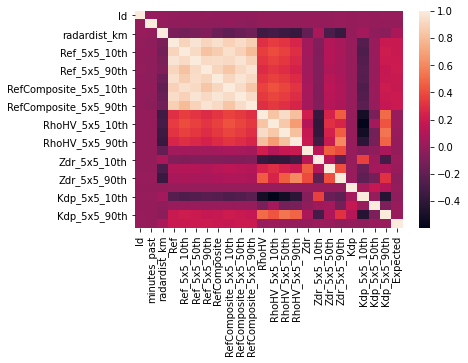

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sns.heatmap(dataf.corr())

In [ ]:
dataf = dataf.drop(dataf.columns[[4,5,6,7,8,9,10]] ,axis = 1 )
x = dataf.drop(columns="Expected", axis=1)

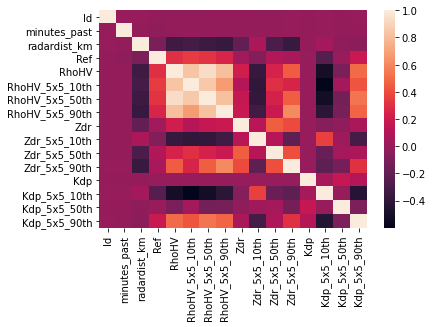

In [ ]:

#wiped data 
x
sns.heatmap(x.corr())


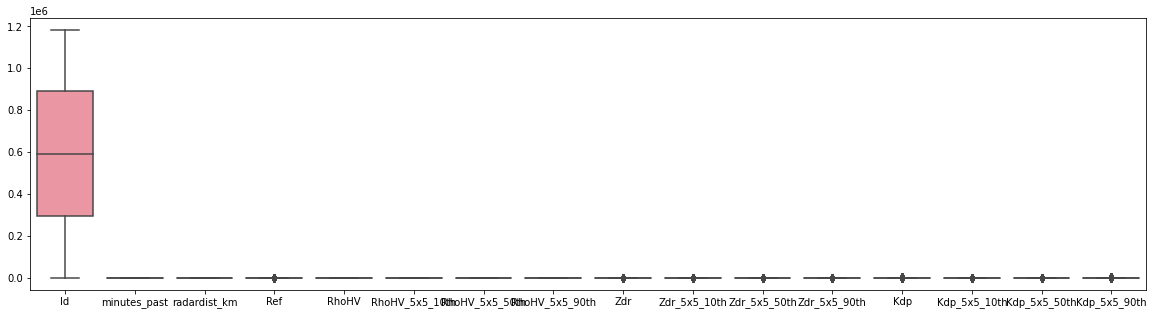

In [ ]:
#
numerical = [c for c in x.columns if x[c].dtype.name != 'object']
plt.figure(figsize=(20,5))
sns.boxplot(data=x[numerical])


In [ ]:
'''
mean = x.mean(axis=0)
std = x.std(axis=0)
x -= mean
x /= std
x


from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x[numerical] = scaler.fit_transform(x[numerical].values.astype(float))
sns.boxplot(data=x[numerical])
'''


In [ ]:
###########TEST DATA LOAD
##we don't have Y_test data in test.csv, let's use train in 70/30 

In [ ]:
y = dataf["Expected"]


In [8]:
!git clone https://github.com/keras-team/keras-tuner.git

Cloning into 'keras-tuner'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 6642 (delta 27), reused 26 (delta 15), pack-reused 6596
Receiving objects: 100% (6642/6642), 2.06 MiB | 1.96 MiB/s, done.
Resolving deltas: 100% (4650/4650), done.


In [9]:
%cd keras-tuner/
!pip install .

/content/keras-tuner
Processing /content/keras-tuner
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1.dev0-cp36-none-any.whl size=91706 sha256=5c0d1e9956ce6409bc2b58979e9bc43146574c64b8309742084cd84e4a7e1c7a
  Stored in directory: /root/.cache/pip/wheels/fa/4e/d0/ed331a3363786e8a74848aa0589674f502cbb3f0321cdba844
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=3b4c682830559e3abe266dea01f1e46b0f85c6dc8d86dd01fac33e11c30e980d
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [10]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from kerastuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow import keras
import tensorflow as tf

In [ ]:
#########################KERAS$TUNER#################################################

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    activation_choice = hp.Choice('activation',values=['relu','tanh','selu'])
    hp_learning_rate = hp.Choice('learning_rate', values = [0.001]) 
    #hp_units = hp.Int('units', min_value = int(240), max_value = 600), step = x.shape[1])
    

    model.add(Dense(units=hp.Int('units_input',    
                                   min_value=700,    
                                   max_value=900,   
                                   step=x.shape[1]),
                    #input_dim=784,
                    activation='tanh'))
    for i in range(hp.Int('num_layers',4,6)):
      model.add(keras.layers.Dense(units=hp.Int('units_'+str(i),        
                                    min_value=x.shape[1]*5,   
                                    max_value=600,   
                                    step=x.shape[1]*2),
                      activation='tanh'))   
    
    model.add(Dense(1))
    model.compile(
        optimizer = hp.Choice('optimizer', values=['adam'
                                                   #'rmsprop',
                                                   #'adadelta'
                                                   ]),
        loss='mae',
        metrics='mae'
        )
    tf.keras.backend.set_floatx('float64')
    return model



In [ ]:
from kerastuner.engine.hyperparameters import HyperParameters

tuner = BayesianOptimization(
                     build_model,
                     objective = 'mae', 
                     max_trials=30,
                     directory="my_dir",
                     overwrite=True
                     )   

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 9
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'selu'], 'ordered': False}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001], 'ordered': True}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 700, 'max_value': 900, 'step': 15, 'sampling': None}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 75, 'max_value': 600, 'step': 30, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 75, 'max_value': 600, 'step': 30, 'sampling': None}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 75, 'max_value': 600, 'step': 30, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 75, 'max_value': 600, 'step': 30, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditio

In [ ]:
dataf.shape

(7407244, 24)

In [ ]:
x = dataf.drop(columns="Expected", axis=1)
y = dataf["Expected"]
################################################
################################################
################################################
################################################
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 2)
################################################
################################################
################################################
del dataf

In [ ]:
tuner.search(x_train, y_train, epochs = 10,batch_size=18372, validation_split=0.3)#, callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]



Trial 30 Complete [00h 00m 46s]
mae: 11.359444682273741

Best mae So Far: 11.352741170574706
Total elapsed time: 00h 16m 27s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/untitled_project
Showing 10 best trials
Objective(name='mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
units_input: 850
num_layers: 6
units_0: 555
units_1: 585
units_2: 585
units_3: 75
optimizer: adam
units_4: 345
units_5: 195
Score: 11.352741170574706
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 0.001
units_input: 715
num_layers: 5
units_0: 525
units_1: 195
units_2: 525
units_3: 135
optimizer: adam
units_4: 135
units_5: 165
Score: 11.354270625476364
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.001
units_input: 715
num_layers: 6
units_0: 495
units_1: 435
units_2: 495
units_3: 75
optimizer: adam
units_4: 495
units_5: 165
Score: 11.354521148261275
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 0.001
units_input: 745
num_layers: 6
units_0: 525
units_1: 195
units_2: 105
units_3: 585
optimizer: adam
units_4: 75
units_5: 75
Score: 11.355021511411422
Trial summa

In [ ]:
model.evaluate(x_test, y_test)
print()

25961/25961 [==============================] - 36s 1ms/step - loss: 11.3527 - mae: 11.3527



In [ ]:
x_train.shape[1]

15

In [ ]:
pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.4.3)


In [ ]:
def graphs(history):
  loss = history["loss"]
  val_loss = history["val_loss"]
  epochs = range(1, len(history['loss']) + 1)
  plt.plot(epochs, loss, 'r', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()
'''
  mae = history['mae']
  val_mae = history['val_mae']
  plt.plot(epochs, mae, 'r', label='Training mae')
  plt.plot(epochs, val_mae, 'b', label='Validation mae')
  plt.title('Training and validation mae')
  plt.xlabel('Epochs')
  plt.ylabel('mae')
  plt.legend()
  plt.show()
'''



"\n  mae = history['mae']\n  val_mae = history['val_mae']\n  plt.plot(epochs, mae, 'r', label='Training mae')\n  plt.plot(epochs, val_mae, 'b', label='Validation mae')\n  plt.title('Training and validation mae')\n  plt.xlabel('Epochs')\n  plt.ylabel('mae')\n  plt.legend()\n  plt.show()\n"

In [ ]:
model = Sequential()
################################################
model.add(Dense(850, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(555, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(400, activation='relu'))
model.add(Dense(355, activation='relu'))
model.add(Dense(195, activation='relu'))
################################################
model.add(Dense(1))



In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 850)               20400     
_________________________________________________________________
dense_1 (Dense)              (None, 555)               472305    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               278000    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               200400    
_________________________________________________________________
dense_4 (Dense)              (None, 355)               142355    
_________________________________________________________________
dense_5 (Dense)              (None, 195)               69420     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [ ]:
model.compile(optimizer='adam', loss='mae')

In [ ]:

history = model.fit(x_train, y_train, epochs=13, batch_size=65536, verbose=1, validation_split=0.2)
history = history.history
#model.fit(x_train, y_train, epochs=8, batch_size=65536, verbose=1, validation_split=0.2)

Epoch 1/13
77/77 [==============================] - 13s 167ms/step - loss: 3312.5649 - val_loss: 207.2980
Epoch 2/13
77/77 [==============================] - 12s 162ms/step - loss: 202.0692 - val_loss: 151.5182
Epoch 3/13
77/77 [==============================] - 13s 163ms/step - loss: 81.5041 - val_loss: 45.4136
Epoch 4/13
77/77 [==============================] - 13s 166ms/step - loss: 40.0513 - val_loss: 18.0050
Epoch 5/13
77/77 [==============================] - 13s 168ms/step - loss: 63.1808 - val_loss: 4.2110
Epoch 6/13
77/77 [==============================] - 13s 171ms/step - loss: 21.7722 - val_loss: 2.8488
Epoch 7/13
77/77 [==============================] - 13s 172ms/step - loss: 8.3980 - val_loss: 2.7762
Epoch 8/13
77/77 [==============================] - 13s 173ms/step - loss: 3.1708 - val_loss: 2.7760
Epoch 9/13
77/77 [==============================] - 13s 169ms/step - loss: 3.0441 - val_loss: 2.7759
Epoch 10/13
77/77 [==============================] - 13s 168ms/step - loss: 

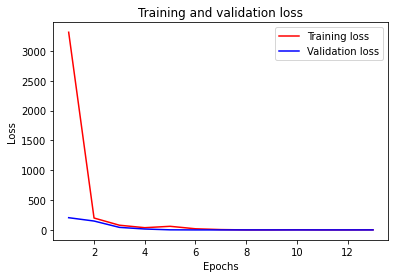

<Figure size 432x288 with 0 Axes>

In [ ]:

# draw all plots
graphs(history)


In [13]:
pred = model.predict(x_test)
print(pred)

[[2.8607037 ]
 [0.54059017]
 [1.0290047 ]
 ...
 [0.73435724]
 [0.6509515 ]
 [0.5755899 ]]


In [ ]:
class Graph:
  def __init__(self, s, r):
    self.x = range(s+1, r+1);
    self.r = r
    self.s = s
  def draw(self, data, data2):
    plt.figure(figsize=(20,5))
    plt.plot(self.x, data[self.s:self.r:1],  'b', label='Expected')
    plt.plot(self.x, data2[self.s:self.r:1],  'r', label='Predict')
    plt.legend()
    plt.show()
    plt.clf()
  def draw1(self, data):
    plt.figure(figsize=(20,5))
    plt.plot(self.x, data[:self.r],  'b', label='Expected')
    plt.legend()
    plt.show()
    plt.clf()


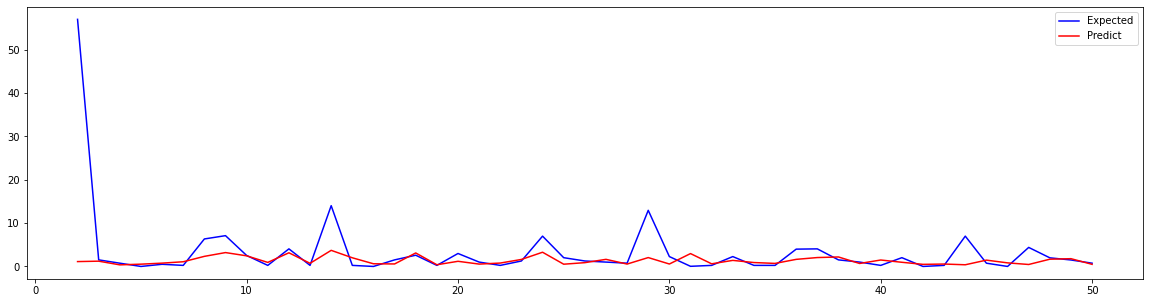

<Figure size 432x288 with 0 Axes>

In [ ]:
graph = Graph(1,50)
graph.draw(y_test, pred)


In [70]:
#CORR
pred = pred.flatten()
#y = y_test.to_numpy().flatten()
np.corrcoef(pred, y_test)

array([[1.        , 0.70014369],
       [0.70014369, 1.        ]])